# Final project
---
**Student**: 

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
 # Check if images are horizontal and rotate if necessary
    if image1.shape[0] > image1.shape[1]:
        image1 = cv2.rotate(image1, cv2.ROTATE_90_CLOCKWISE)
    if image2.shape[0] > image2.shape[1]:
        image2 = cv2.rotate(image2, cv2.ROTATE_90_CLOCKWISE)
    if image3.shape[0] > image3.shape[1]:
        image3 = cv2.rotate(image3, cv2.ROTATE_90_CLOCKWISE)

In [16]:
def resize_image(image, size):
    return cv2.resize(image, size, interpolation = cv2.INTER_LINEAR)


In [18]:
def preprocess(image1, image2, image3):
    # Find the smallest dimensions among the images
    min_height = min(image1.shape[0], image2.shape[0], image3.shape[0])
    min_width = min(image1.shape[1], image2.shape[1], image3.shape[1])

    # Resize the images to the smallest dimensions
    image1_resized = resize_image(image1, (min_width, min_height))
    image2_resized = resize_image(image2, (min_width, min_height))
    image3_resized = resize_image(image3, (min_width, min_height))

    # Pass the resized images to your stitch_images function
    result = stitch_images(image1_resized, image2_resized, image3_resized)
    return result

In [2]:
#Load the photo
im_photo = cv2.imread("sources/train/g6_pt1.jpeg")
im_photo2 = cv2.imread("sources/train/g6_pt2.jpeg")
im_photo3 = cv2.imread("sources/train/g6_pt3.jpeg")

In [42]:
img2 = cv2.imread("sources/train/g10_pt2.jpeg", cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("sources/train/g10_pt3.jpeg", cv2.IMREAD_GRAYSCALE)

# Ensure that the input images are in the correct format
img2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
img3 = cv2.normalize(img3, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Detect and match keypoints
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img2, None)
kp2, des2 = sift.detectAndCompute(img3, None)
bf = cv2.BFMatcher_create()
matches = bf.knnMatch(des1, des2, k=2)
# Filter the most representative keypoints according to its distance (computed using KNN)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
# Select four matching keypoints
pts1 = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

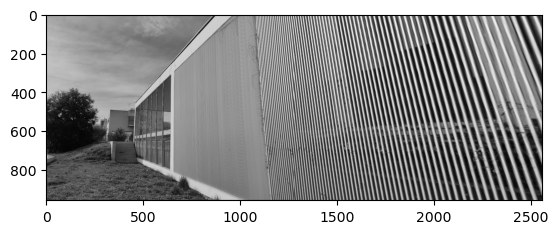

In [43]:
# Calculate homography
H, _ = cv2.findHomography(pts2, pts1, cv2.RANSAC)

# Warp the second image onto the first image
result2 = cv2.warpPerspective(img3, H, (img2.shape[1] + img3.shape[1], img2.shape[0]))
result2[:img2.shape[0], :img2.shape[1]] = img2
# Display the result
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.show()

In [44]:
img1 = cv2.imread("sources/train/g10_pt1.jpeg", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("sources/train/g10_pt2.jpeg", cv2.IMREAD_GRAYSCALE)

# Ensure that the input images are in the correct format
img1 = cv2.normalize(img1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
img2 = cv2.normalize(img2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Detect and match keypoints
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
bf = cv2.BFMatcher_create()
matches = bf.knnMatch(des1, des2, k=2)
# Filter the most representative keypoints according to its distance (computed using KNN)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)
# Select four matching keypoints
pts1 = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

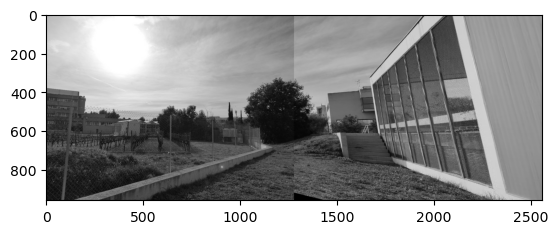

In [45]:
# Calculate homography
H, _ = cv2.findHomography(pts2, pts1, cv2.RANSAC)

# Warp the second image onto the first image
result = cv2.warpPerspective(img2, H, (img1.shape[1] + img2.shape[1], img1.shape[0]))
result[:img1.shape[0], :img1.shape[1]] = img1
# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

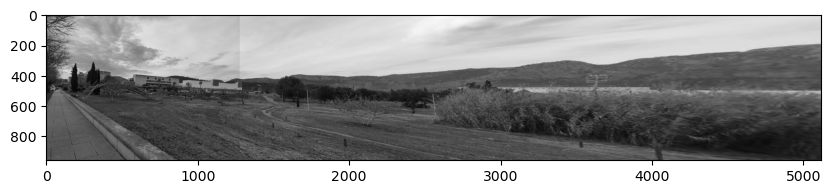

In [30]:


# Detect and match keypoints between 'result' and 'result2'
sift = cv2.SIFT_create()
kp_result, des_result = sift.detectAndCompute(result, None)
kp_result2, des_result2 = sift.detectAndCompute(result2, None)
bf = cv2.BFMatcher_create()
matches = bf.knnMatch(des_result, des_result2, k=2)

# Filter the most representative keypoints according to its distance (computed using KNN)
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

# Select four matching keypoints
pts_result = np.float32([kp_result[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
pts_result2 = np.float32([kp_result2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

# Calculate homography
H, _ = cv2.findHomography(pts_result2, pts_result, cv2.RANSAC)

# Warp 'result2' onto 'result'
final_result = cv2.warpPerspective(result2, H, (result.shape[1] + result2.shape[1], result.shape[0]))
final_result[:result.shape[0], :result.shape[1]] = result

# Display the final result
plt.figure(figsize=(10, 5))  # Set the figure size to 10x5 inches
plt.imshow(cv2.cvtColor(final_result, cv2.COLOR_BGR2RGB))
plt.show()


In [3]:
def preprocess_image(img, size=None):
    # If no size is provided, use the size of the image
    if size is None:
        size = img.shape[1], img.shape[0]  # width, height

    # Calculate the aspect ratio of the image
    aspect_ratio = img.shape[1] / img.shape[0]  # width / height

    # Calculate the new dimensions while maintaining aspect ratio
    if aspect_ratio > 1:
        # Landscape orientation - wide image
        new_width = size[0]
        new_height = round(new_width / aspect_ratio)
    else:
        # Portrait orientation - tall image
        new_height = size[1]
        new_width = round(new_height * aspect_ratio)

    # Resize the image
    img_resized = cv2.resize(img, (new_width, new_height))

    # Normalize the image to 0 - 255
    img_normalized = cv2.normalize(img_resized, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    return img_normalized

In [17]:
def estimate_sift_parameters(img):
    # Estimate the number of octaves based on the image size
    num_octaves = int(np.log2(min(img.shape))) - 3
    
    # Estimate the number of octave layers based on the image complexity
    num_octave_layers = 3  # This is typically set to 3 in the literature
    
    # Estimate the contrast threshold based on local contrast
    local_contrast = np.std(img)
    contrast_threshold = 0.04 / num_octave_layers * local_contrast
    
    # Estimate the edge threshold based on local edge characteristics
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    edge_magnitude = np.hypot(sobelx, sobely)
    edge_threshold = np.percentile(edge_magnitude, 90)
    
    # Estimate the number of features based on the image content and complexity
    num_features = int(0.01 * img.size)
    
    return num_features, num_octave_layers, contrast_threshold, edge_threshold


In [28]:
def estimate_ransac_parameters(src_pts, dst_pts):
    # Calculate the Euclidean distance between each pair of source and destination points
    #distances = np.sqrt(np.sum((src_pts - dst_pts)**2, axis=1))
    
    # Estimate the reprojection threshold as the median of these distances
    #reprojectionThreshold = np.median(distances)
    
    # Estimate the confidence as the fraction of points that are within the reprojection threshold
    #confidence = np.mean(distances < reprojectionThreshold)
    # Get the dimensions of the image
    image_height, image_width, _ = image.shape
    outlier_ratio = 0.2  # 20% outlier ratio
    sample_size = 3  # For a linear model, sample 3 points
    num_iterations = 1000  # Can be adjusted based on the problem and expected number of outliers
    # Calculate reprojection threshold as a fraction of the image dimensions
    reprojectionThreshold = max(image_width, image_height) * 0.005  # Adjust the fraction as per the application's requirements
    # Calculate confidence based on the desired success probability
    confidence = 1 - (1 - outlier_ratio ** sample_size) ** num_iterations
    return reprojectionThreshold, confidence

In [ ]:
def estimate_ransac_parameters2(image):
    image_height, image_width, _ = image.shape
    outlier_ratio = 0.2  # 20% outlier ratio
    sample_size = 3  # For a linear model, sample 3 points
    num_iterations = 1000  # Can be adjusted based on the problem and expected number of outliers
    # Calculate reprojection threshold as a fraction of the image dimensions
    reprojectionThreshold = max(image_width, image_height) * 0.005  # Adjust the fraction as per the application's requirements
    # Calculate confidence based on the desired success probability
    confidence = 1 - (1 - outlier_ratio ** sample_size) ** num_iterations
    return reprojectionThreshold, confidence

In [19]:
def estimate_lowes_ratio(matches):
    # Calculate the ratio of the distance of the best match to the distance of the second best match for each set of matches
    ratios = [m[0].distance / m[1].distance for m in matches if len(m) > 1]
    
    # Estimate Lowe's ratio as the median of these ratios
    lowes_ratio = np.median(ratios)
    
    return lowes_ratio

In [64]:
import cv2
import numpy as np

def stitch_images_img2_3(img1, img2):

    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    '''
    # FLANN parameters
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)
    '''
    
    bf = cv2.BFMatcher_create()
    matches = bf.knnMatch(des1, des2, k=2)
    
    # Store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)


    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(dst_pts,src_pts , cv2.RANSAC)
    
    result = cv2.warpPerspective(img2, M, (img1.shape[1] + img2.shape[1], img1.shape[0]))
    result[:img1.shape[0], :img1.shape[1]] = img1
    
    '''
    # Compute the size of the panorama
    width_panorama = max(img1.shape[1] + img2.shape[1]*2, img1.shape[1])
    height_panorama = max(img1.shape[0], img2.shape[0])

    # Warp the second image with the found homography
    result = cv2.warpPerspective(img2, M, (width_panorama, height_panorama))
    result[:img1.shape[0], :img1.shape[1]] = img1
    '''
    return result, M

In [67]:
import cv2
import numpy as np

def stitch_images(img1, img2):
    # Initialize SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    # Match features between the two images
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append(m)

    # Homography
    if len(good)>10:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))

    # Stitch images
    dst = cv2.warpPerspective(img1,M,(img2.shape[1] + img1.shape[1], img2.shape[0]))
    dst[0:img2.shape[0], 0:img2.shape[1]] = img2

    return dst


In [ ]:
def stitch_images(img1, img2, img3):
    # Initialize SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    kp3, des3 = sift.detectAndCompute(img3, None)

    # Match features between the two images
    bf = cv2.BFMatcher()
    matches1 = bf.knnMatch(des1, des2, k=2)
    matches3 = bf.knnMatch(des3, des2, k=2)

    # Apply ratio test
    good1 = []
    for m,n in matches1:
        if m.distance < 0.75*n.distance:
            good1.append(m)
    good3 = []
    for m,n in matches3:
        if m.distance < 0.75*n.distance:
            good3.append(m)

    # Homography
    if len(good1)>10:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good1 ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good1 ]).reshape(-1,1,2)
        M1, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        h,w = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M1)
        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        print("Not enough matches are found - %d/%d" % (len(good1),MIN_MATCH_COUNT))

    if len(good3)>10:
        src_pts = np.float32([ kp3[m.queryIdx].pt for m in good3 ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good3 ]).reshape(-1,1,2)
        M3, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        h,w = img3.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M3)
        img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
    else:
        print("Not enough matches are found - %d/%d" % (len(good3),MIN_MATCH_COUNT))

    # Stitch images
    dst1 = cv2.warpPerspective(img1,M1,(img2.shape[1] + img1.shape[1], img2.shape[0]))
    dst1[0:img2.shape[0], 0:img2.shape[1]] = img2
    dst3 = cv2.warpPerspective(img3,M3,(img2.shape[1] + img3.shape[1], img2.shape[0]))
    dst3[0:img2.shape[0], 0:img2.shape[1]] = img2

    return dst1, dst3


In [4]:
def equalize_histogram_color(img):
    if len(img.shape) < 3 or img.shape[2] != 3:
        # Handle the case where the input image is single-channel or does not have 3 channels
        return img

    # Convert the image to YCrCb color space
    img_y_cr_cb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

    # Split the image into its channels
    y, cr, cb = cv2.split(img_y_cr_cb)

    # Equalize the histogram of the Y channel
    y_eq = cv2.equalizeHist(y)

    # Merge the equalized Y channel back with the other channels
    img_y_cr_cb_eq = cv2.merge((y_eq, cr, cb))

    # Convert the image back to BGR color space
    img_bgr_eq = cv2.cvtColor(img_y_cr_cb_eq, cv2.COLOR_YCrCb2BGR)

    return img_bgr_eq

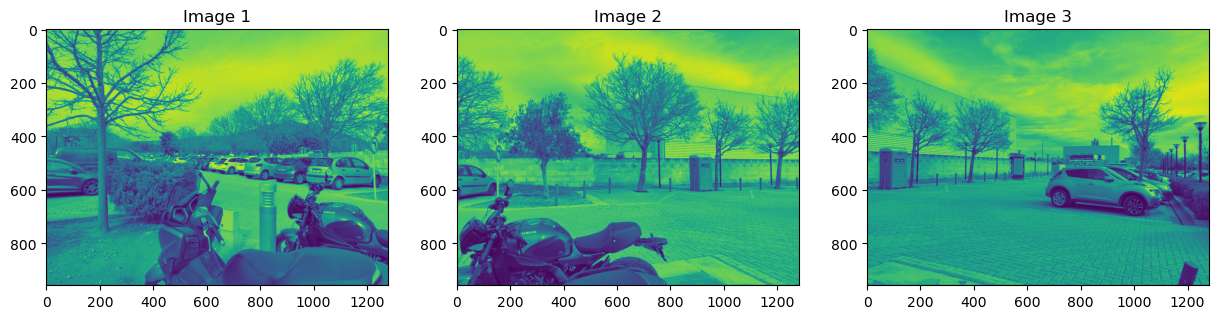

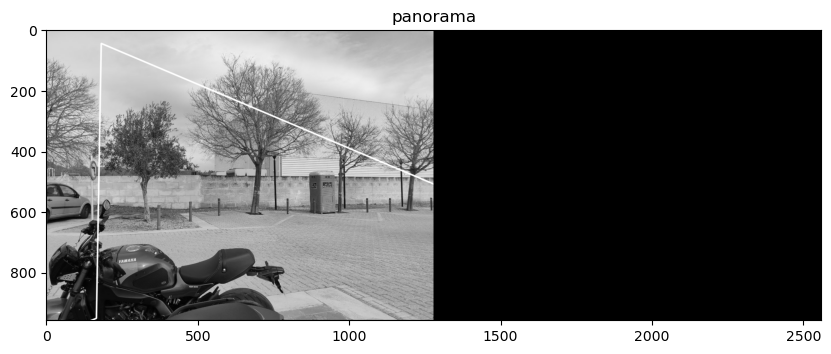

In [69]:
def create_panorama():
    img1 = cv2.imread('sources/train/g8_pt1.jpeg', cv2.IMREAD_GRAYSCALE)  # queryImage
    img2 = cv2.imread('sources/train/g8_pt2.jpeg', cv2.IMREAD_GRAYSCALE)  # trainImage
    img3 = cv2.imread('sources/train/g8_pt3.jpeg', cv2.IMREAD_GRAYSCALE)  # trainImage

    # Determine the smallest dimensions
    min_width = min(img1.shape[1], img2.shape[1], img3.shape[1])
    min_height = min(img1.shape[0], img2.shape[0], img3.shape[0])

    # Preprocess the images
    img1 = preprocess_image(img1, size=(min_width, min_height))
    img2 = preprocess_image(img2, size=(min_width, min_height))
    img3 = preprocess_image(img3, size=(min_width, min_height))
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(img1, cmap='viridis')
    axs[0].set_title("Image 1")
    axs[1].imshow(img2, cmap='viridis')
    axs[1].set_title("Image 2")
    axs[2].imshow(img3, cmap='viridis')
    axs[2].set_title("Image 3")
    plt.show()

    #result2 = stitch_images(img2, img3)
    # Stitch result1 and image3
    #result3 = stitch_images(result1, img3)
     # Stitch result1 and image3
    panorama = stitch_images(img1, img2)
    if panorama is not None and panorama.any():
        panorama = equalize_histogram_color(panorama)
        # Display the final result
        plt.figure(figsize=(10, 5))  # Set the figure size to 10x5 inches
        plt.imshow(cv2.cvtColor(panorama, cv2.COLOR_BGR2RGB))
        plt.title('panorama')
        plt.show()
        '''
        plt.figure(figsize=(10, 5))  # Set the figure size to 10x5 inches
        plt.imshow(cv2.cvtColor(pan, cv2.COLOR_BGR2RGB))
        plt.title('pan')
        plt.show()
        '''
create_panorama()

In [ ]:
 # Convert images to YUV color space
    image1_yuv = cv2.cvtColor(img1, cv2.COLOR_BGR2YUV)
    image2_yuv = cv2.cvtColor(img2, cv2.COLOR_BGR2YUV)
    image3_yuv = cv2.cvtColor(img3, cv2.COLOR_BGR2YUV)

    # Apply histogram equalization to the Y channel
    image1_yuv[:,:,0] = cv2.equalizeHist(image1_yuv[:,:,0])
    image2_yuv[:,:,0] = cv2.equalizeHist(image2_yuv[:,:,0])
    image3_yuv[:,:,0] = cv2.equalizeHist(image3_yuv[:,:,0])

    # Convert back to BGR color space
    image1_equalized = cv2.cvtColor(image1_yuv, cv2.COLOR_YUV2BGR)
    image2_equalized = cv2.cvtColor(image2_yuv, cv2.COLOR_YUV2BGR)
    image3_equalized = cv2.cvtColor(image3_yuv, cv2.COLOR_YUV2BGR)

First approach:
1 desconectada, 2 bien, 3 casi hace otra foto (3 que se vea el arbol), 4 casi demasiad el angulo, 5 bien, 6 bien,  7 casi la ultima foto mehh, 8 casi la primera foto la moto duplicada solo 2 fotos, 9 casi parece buggeada, 10 ok, 11 ok, 12 revisar buggeada, 13 ok aqui se ve un cambio de luz, 14 se revento, 15 no esta mal revisar farola, 16 (foto de noche ) ok, 17 solo hay 2 fotos 1 y 2, 18 solo hay 2 fotos la tercera rompe la perspective?,19 lo mismo que en la 18,  20 lo mismo.

Suaviazar cambios de luz, hacer que obligatoriamente esten las 3 imagenes.


In [ ]:
    '''
    # FLANN parameters
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)
    '''

The following code stitch good the images without applying transformations on the img2, but the right part is in black. I noticed the transition

In [ ]:
def stitch_images_img1_2(img1, img2):

    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # If img2 is grayscale, convert it to BGR
    if len(img2.shape) == 2:
        img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    
    bf = cv2.BFMatcher_create(cv2.NORM_L2, crossCheck=False)
    matches = bf.knnMatch(des1, des2, k=2)
    
    # Store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)

    # Warp img1 to img2's plane
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    #img1_warped = cv2.warpPerspective(img1, np.linalg.inv(M), (w1 + w2, h2))
    img1_warped = cv2.warpPerspective(img1, np.linalg.inv(M),  (img2.shape[1] + img1.shape[1], img2.shape[0]))
    #img1_warped[0:img2.shape[0], 0:img2.shape[1]] = img2
    # If img1_warped is grayscale, convert it to BGR
    if len(img1_warped.shape) == 2:
        img1_warped = cv2.cvtColor(img1_warped, cv2.COLOR_GRAY2BGR)

    # Create output image (leave some extra space on the right side)
    output = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)

    # Place img2 in the output image
    output[0:h2, 0:w2, :] = img2

    # Blend img1_warped into the output image
    for i in range(h2):
        for j in range(w2):
            if np.array_equal(img1_warped[i, j], [0, 0, 0]):
                alpha = 0.5
            else:
                alpha = 1.0
            output[i, j, :] = alpha * img1_warped[i, j, :] + (1 - alpha) * output[i, j, :]

    return output


The same but the transition is better

In [ ]:
def stitch_images_img1_2(img1, img2):

    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # If img2 is grayscale, convert it to BGR
    if len(img2.shape) == 2:
        img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    
    bf = cv2.BFMatcher_create(cv2.NORM_L2, crossCheck=False)
    matches = bf.knnMatch(des1, des2, k=2)
    
    # Store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)

    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC)

    # Warp img1 to img2's plane
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    img1_warped = cv2.warpPerspective(img1, np.linalg.inv(M), (w1 + w2, h2))

    # If img1_warped is grayscale, convert it to BGR
    if len(img1_warped.shape) == 2:
        img1_warped = cv2.cvtColor(img1_warped, cv2.COLOR_GRAY2BGR)

    # Create output image (leave some extra space on the right side)
    output = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)

    # Place img1_warped in the output image
    h1w, w1w = img1_warped.shape[:2]  # get the size of img1_warped
    output[0:h1w, 0:w1w, :] = img1_warped

    # Blend img2 into the output image
    for i in range(h2):
        for j in range(w2):
            if np.array_equal(output[i, j], [0, 0, 0]):
                alpha = 1.0
            else:
                alpha = 0.5
            output[i, j, :] = alpha * img2[i, j, :] + (1 - alpha) * output[i, j, :]

    # Remove the black part of the image
    gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    output = output[y:y+h, x:x+w]

    return output


In [ ]:
The img1 where the M2 is apply has more translation on the x then shows almost all the image

In [ ]:
def stitch_images_img1_2(img1, img2):

    # Initiate SIFT detector
    sift = cv2.SIFT_create()

    # If img2 is grayscale, convert it to BGR
    if len(img2.shape) == 2:
        img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    # Find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)
    
    bf = cv2.BFMatcher_create(cv2.NORM_L2, crossCheck=False)
    matches = bf.knnMatch(des1, des2,k=2)
    # Sort the matches based on their distances

  
    
    # Store all the good matches as per Lowe's ratio test.
    good = []
    for m, n in matches:
        if m.distance < 0.6 * n.distance:
            good.append(m)
    # Remove points that do not meet the specified condition
    #good = [m for m in good if kp1[m.queryIdx].pt[0]  > img1.shape[1] / 2 and kp2[m.trainIdx].pt[0] > img2.shape[1] / 2]

    # Convert the remaining matches to a list of DMatch objects
    matches = [cv2.DMatch(_idx, _idx, 0) for _idx in range(len(good))]

    # Draw the remaining matches
    img_matches = cv2.drawMatches(img2, kp1, img1, kp2, matches, None, flags=2)

    # Display the result
    plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
    plt.show()
    PATH_OUTPUT= "output_image.jpg"
    #Write the output image
    output_image_rgb = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)
    cv2.imwrite(PATH_OUTPUT, output_image_rgb)
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    M, _ = cv2.findHomography(dst_pts,src_pts, cv2.RANSAC)
    print(M)
    M3=np.linalg.inv(M)
    print(M3)
    # Calculate the width of the non-overlapping part of img1
    non_overlap_width = img2.shape[1]*0.7

    # Create a translation matrix
    T = np.array([[1, 0, non_overlap_width], [0, 1, 0], [0, 0, 1]])
    M2=np.linalg.inv(M)
    # Apply the translation to the homography matrix
    M2 = np.dot(T, M2)

    # Warp img1 to img2's plane
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]
    img1_warped = cv2.warpPerspective(img2, M2, (w1 + w2, h1))

    # If img1_warped is grayscale, convert it to BGR
    if len(img1_warped.shape) == 2:
        img1_warped = cv2.cvtColor(img1_warped, cv2.COLOR_GRAY2BGR)

    # Create output image (leave some extra space on the right side)
    output = np.zeros((max(h1, h2), w1 + w2 , 3), dtype=np.uint8)

    # Place img1_warped in the output image
    h1w, w1w = img1_warped.shape[:2]  # get the size of img1_warped
    output[0:h1w, 0:w1w, :] = img1_warped

    # Blend img2 into the output image
    for i in range(h2):
        for j in range(w2):
            if np.array_equal(output[i, j], [0, 0, 0]):
                alpha = 1.0
            else:
                alpha = 0.5
            output[i, j, :] = alpha * img2[i, j, :] + (1 - alpha) * output[i, j, :]

    # Remove the black part of the image
    gray = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(cnt)
    output = output[y:y+h, x:x+w]

    return output
